# Functions

Using the recipe as an analogy, we can see that the main recipe contains a reference to `IWC`, which is a shorthand for  another recipe for making the ice-cream, whipped cream, cherry (IWC) portions

![programming_6.png](images/programming_6.png)

Functions are like recipes that are referred to by a label. They allow us to hide away details and focus on the main steps in a program.

---
## Data preparation

To illustrate the use of functions, we will use the example data frame with patient data

In [ ]:
df <- data.frame(id=c(20201,20205,20212,20213,20216),
                 age=c(19,45, 23, 55, 65), 
                 name=c("Alice","Bob","Charlie","David", "Eliza"),
                 risk=c("low", "med", "high", "high", "med"))

df$risk <- factor(df$risk, levels=c("low","med","high"), ordered=TRUE)

df

---
## Overview of functions

Functions are a method for abstracting a block of code by giving it a name and assigning it to a variable. We have used a number of them already and we will explore them in greater detail

A function may take ```inputs```(s) to be processed, ```argument```(s) that can modify the behavior of the code within the function, and ```return``` output(s)   

![function.png](images/function.png)
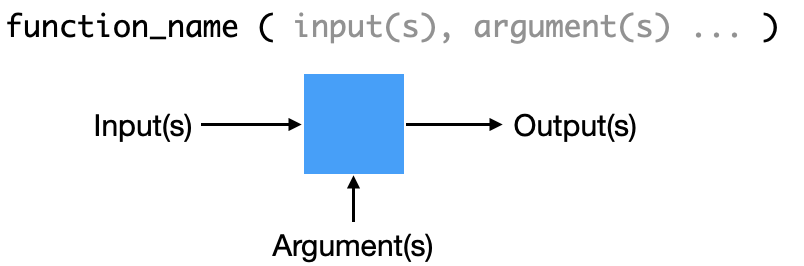

## Using built-in functions

R has several built-in functions that are loaded in the environment. To see documentation for a function, we prepend ```?``` to a function name

Let us look at the documentation for the `summary` function that provides summary statistics for input data

In [ ]:
# built-in help

?summary

## Function arguments

A function may take arguments that can include input data and modifiers. The arguments can be referred to using ```positions``` and ```keywords```

![function_args.png](images/function_args.png)

We can take a look at the built-in ```summary``` function to illustrate the use of ```positional``` and ```keyword``` arguments

For ```summary```, the order of arguments from the documentation
1. ```object```: data input
2. ```maxsum```: maximum number of levels to show (default =7)
3. ```digits```: number of digits to show (default=3)
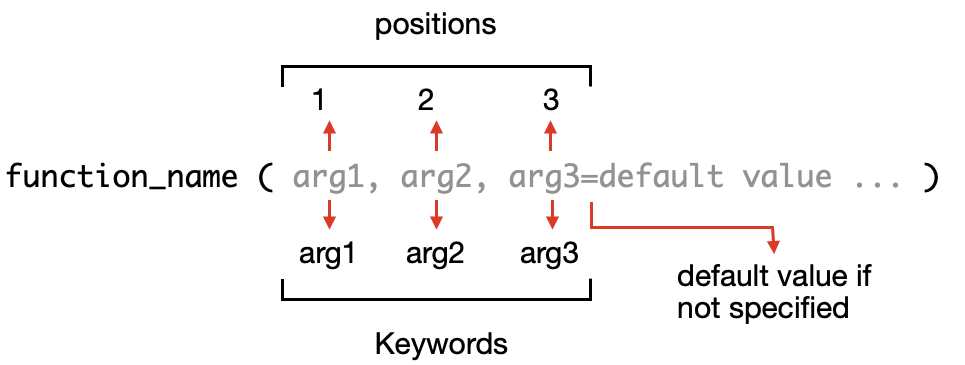

Let us use this function to summarize our data in `df`

In [ ]:
df

The `summary` function takes in the data as an `object` as its first argument. If we do not include any other additional arguments, the default values for `maxsum` and `digits` are used

In [ ]:
summary(df) # uses default maxsum=7 and digits=3

If we wish to override the default value, we can specify the value we want. Here, we want to reduce the output to 2 digits of precision and we include the `digits=2` keyword argument

In [ ]:
summary(df, digits=2) # override the default of 3 digits precision

We can also omit the keyword, the function will use values in  arguments according to their position. Recall that `summary` takes in arguments in this order
- `object`: data input
- `maxsum`: maximum number of levels to show (default=7)
- `digits`: number of digits to show (default=3)

Previously, we used the keyword `digits=2` argument to reduce the precision of the output. 
- If we omit the keyword and just put the value in the 2nd position, this will be interpreted as a positional argument (i.e. `maxsum` instead of the intended `digits` option)


In [ ]:
summary(df, 2) # if no keyword specified, argument uses the position (2 = maxsum)

If we want to specify arguments without keywords, we will need to include all the arguments in the proper order
- Here, if we want to specify the `digits` argument (3rd position), we will need to include arguments in position 1 and 2 in the proper order

In [ ]:
summary(df, 7, 2) # if no keywords specified, argument uses the position (2 = maxsum, 3 = digits)

If we specify the keywords for the arguments, they will override the positions

In [ ]:
summary(df, digits=2, maxsum=7) # when keywords are specified, the override the positions

**Recommendation**
- Prefer keyword arguments (unless only few arguments)
- Try not to mix keyword and positional arguments

---
## Defining own functions to abstract away details of code

We can use functions to abstract away the details of our code and giving it a name. Because it abstracts away the implementation details, we are able to think about problem solving at a higher level

For instance, the ```mean``` function hides away the details of the code that calculates the average values. We can treat it as a building block for thinking about how it can be used in the larger context of a problem

![function_abstract.png](images/function_abstract.png)
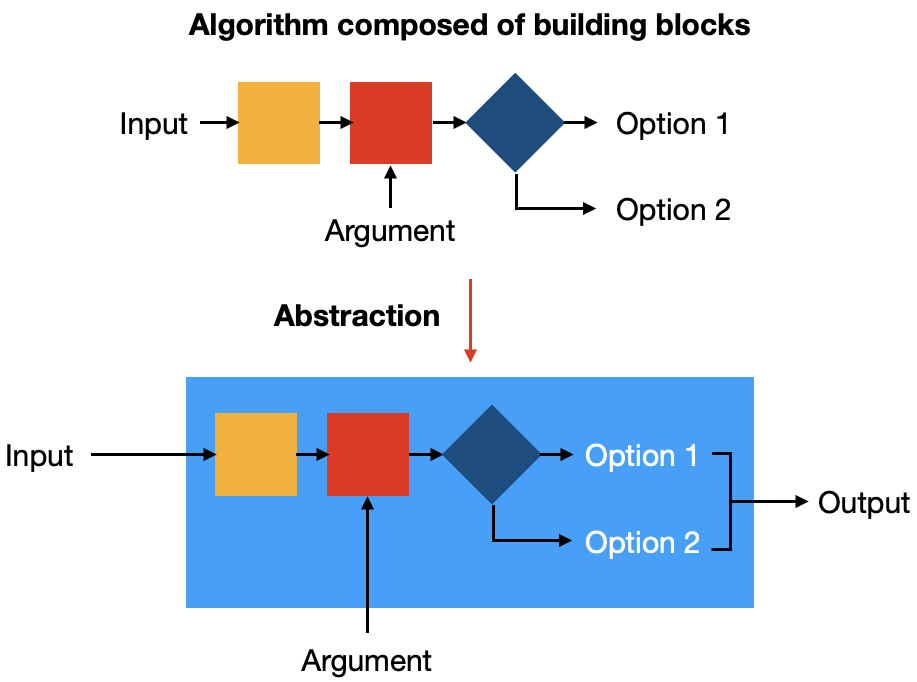

A function is defined using `function()` and assigning it to a variable
- Inputs/arguments are specified as parameters of `function()`
- The inputs/arguments are used as variables in the function
- the `{}` block defines the code that will be executed when the function is called

![function_definition.png](images/function_definition.png)


As an example, we will define our own function to calculate the mean of input data and assign it to the variable `my_mean`
- The argument `input` is used as an variable to store the input
- The average value is computed and stored in the variable `mean`
- the result in `mean` is returned using `return()`

In [ ]:
# defining own function using other functions

my_mean <- function(input) { # argument position=1 or keyword=data
    
    mean <- sum(input)/length(input) # variable is defined inside function
    
    return(mean)
    
}

We can inspect the code we wrote for the function by looking at the variable `my_mean` 

In [ ]:
# inspecting the underlying code by omitting the ()

my_mean

We can use our new `my_mean` function to compute the mean of `age` column in our data frame `df`. Recall that we can extract the vector of data from the data frame using the `$` selector

In [ ]:
df$age

We can use this as input to our `my_mean` function to compute the mean. We can choose to refer to the argument by position or keyword

In [ ]:
my_mean(df$age)         # position 1
my_mean(input = df$age) # keyword

Note that when `df$age` is specified as the `input` argument in the function, the data is assigned to the argument variable `input`. 
- Once the input is assigned to the internal variable `input`, it can be used and referenced within the function

![function_passing.png](images/function_passing.png)

---
## Scope of variables in functions

Functions hide away details of the implementation within the function blocks `{}`. These blocks affect the access (or scope) of the variables from inside and outside the function. Knowing this will help us avoid confusion about variables that may overlap

### 1. Scope of variables inside the function

When we write a function, let us consider what happens to variables _inside_ the function block ```{}``` 
- Having the same variable names inside the function may inadvertently **interfere** with the same variables outside the function.
- For this reason, variables inside the function block ```{}``` are separate from variables outside the function. 

![function_scope_local.png](images/function_scope_local.png)

Variables inside a function are **local** and are **not** visible outside the function block
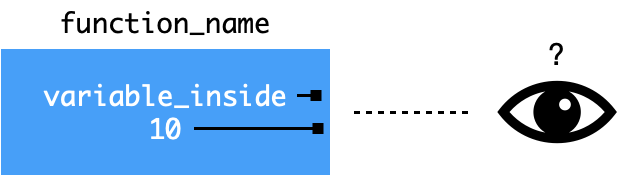

We can illustrate this using a simple function that defines a variable `variable_inside` within the function block `{}`

In [ ]:
function_name <- function() {
    
    variable_inside <- 10
    
}

When we run the function, we do not see any output as we did not return any value

In [ ]:
function_name()

We can try to inspect `variable_inside` that was defined inside the function

In [ ]:
variable_inside

We can see that ```variable_inside``` that was defined inside the function block is **not** visible outside the function.

We can obtain the values from inside the function by using
- ```print``` to inspect the values of variable inside the function
- ```return``` to return or export the values outside the function

#### 1.1. Using ```print``` to inspect variables inside a function
The contents of a variable can be inspected by using the ```print``` function

![function_print.png](images/function_print.png)

```print``` transfers the contents of the variable to the ```console``` which is the output that we seen on the screen
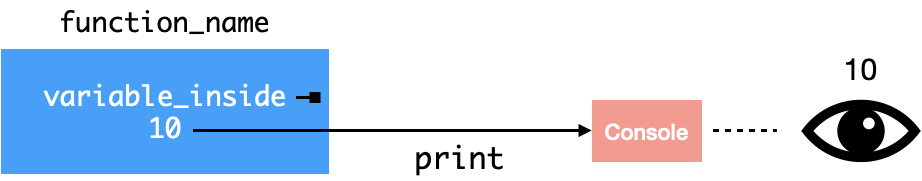

In [ ]:
function_name <- function() {
    
    variable_inside <- 10
    print(variable_inside)
    
}

In [ ]:
function_name()

#### 1.2. Using ```return``` to export results from function

![function_return.png](images/function_return.png)

The result can be returned using the ```return``` function
- If it is _not_ assigned to a variable, it will be printed out on the console
- If it is assigned to a variable, the result will be stored and not printed out
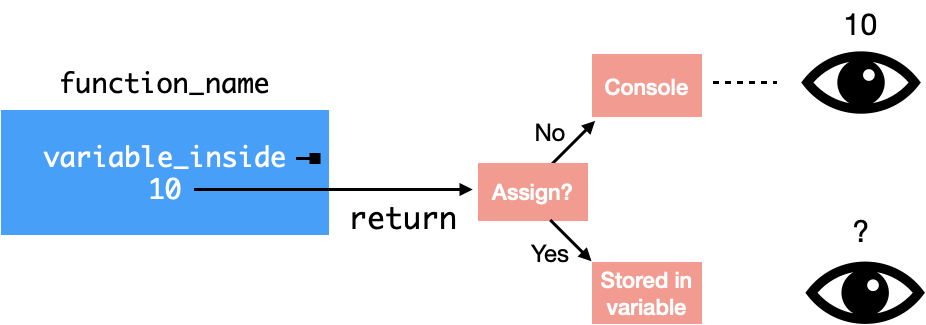

In [ ]:
function_name <- function() {
    
    variable_inside <- 10
    return(variable_inside)
    
}

In [ ]:
function_name()

In [ ]:
variable_inside

In [ ]:
save_result <- function_name()

In [ ]:
save_result

### 2. Scope of variables outside the function

Variables _outside_ the function can be accessed from inside of a function. These are known as **global** variables and they can be a source of errors when writing functions

Within a function block `{}`, variables are accessed in the following order:
- **local** variables (defined locally or specified in arguments)
- **global** variables (defined outside the function)

Let us consider a function which prints the variable `data`
- As the the `variable` is not defined either as an input argument or a local variable, the function looks for the variable __outside__ the function block `{}`

In [ ]:
function_global <- function() {
    
    print(data)
    
    }

We can define the vector `data` and run the function

In [ ]:
data <- c(10,20,30,40,50)

function_global()

As you can see, the function prints out the contents of the variable `data` as it is a **global** variable outside the function and it is accessible within the function
- This can be source of errors if we inadvertently use a **global** variable _inside_ the function

Let us look at an example where referencing a **global** variable by mistake _inside_ a function can lead to unintended results
- We define a function to calculate the mean of `input` as before.
- However, in this case, we mistakenly reference a **global** variable `data2` in the function

In [ ]:
function_error <- function(input) {

    mean <- sum(input)/length(data2) # data2 is not defined locally
    return(mean)

    }

We will create 2 different vectors of numbers `data` and `data2`. These variables are **global** as they exist _outside_ of any functions

In [ ]:
data <- c(10,20,30,40,50)
data2 <- c(10,20,30,40,50,60,70,80,90,100)

We calculate the mean of `data` by specifying it as the argument to our function `function_error`

In [ ]:
function_error(data)

Notice that no error was reported but the result is incorrect (it should be 30). This is because we inadvertently referenced the **global** variable `data2` in our function
- `data` was correctly specified as the `input`
- the `sum` of the `input` = 10+20+30+40+50 = 150
- the `length` was computed from the **global** variable `data2` = 10
- the final `mean` was incorrectly computed as 150/10 = 15

---
## Recommendations for variables when writing functions

As we have seen, the scope of the variables matters when writing functions. As a guide:
- All inputs and arguments that are used in code of a function should be explicitly specified in the function definition `function(argument_1, argument_2, ...)`
- Do not use global variables as inputs for a function
- Check that every variable used within the function is defined either locally or specified as an argument
- Use the `return()` function to export output from a function

---
## Using concepts to develop a function

We will revisit the earlier example where we used conditional statements to decide whether a patient should be admitted or not

In [ ]:
# iterating through the cases by id

pt_ids <- df$id

for (pt_id in pt_ids) {

    person <- df[df$id == pt_id,]
    
    if (person$age >50 | person$risk=="high") { 
    print("admit")
    } else { 
    print("review later")
    }

    
}

We will wrap the code within a function that we call ```decide```, which allows us to abstract away the details and generalize it beyond the `df` variable in the original code
- This function takes a dataframe as an argument ```input_df```
- References to a specific data frame `df` in our original code are replaced with the local argument variable `input_df`
- This allows the function accept other inputs besides `df` by specifying the name of the data frame in the argument

In [ ]:
decide <- function(input_df) {
    
    pt_ids <- input_df$id       # we reference dataframe specified in the input_df variable

    for (pt_id in pt_ids) {
        
        person <- input_df[input_df$id == pt_id,] # we reference dataframe specified in the input_df variable

        if (person$age >50 | person$risk=="high") {
            print("admit")
        } else { 
            print("review later")
        }
        }
} 

In [ ]:
decide(df)

The output looks good, and we have abstracted away the code into a function that can be reused

We can try to save the results by assigning it to a variable `result` for further processing

In [ ]:
result <- decide(df)

In [ ]:
result

The ```print``` output was not captured and therefore no results were saved into the ```result``` variable. As mentioned, ```print``` is used for inspecting values inside the function and **not** for exporting values to be assigned to a variable 

To obtain the results from the function, we replace ```print``` with  ```return```  that can export values from the function. To do this, we need to consider that ```return``` can only export a **single** data structure(object)
- The result from each conditional test needs to be saved to _single_ data structure(object) that can contain multiple values
- In our code, we want to return decision values that are strings/characters `"admit"`, `"review later"`
- As they are the _same_ type, we can use a ```vector``` to hold the decision values for each patient
- Recall that we can create an empty vector and add values to it as we iterate through each patient
- Once we complete the iteration, a _single_ vector containing the multiple outputs for each patient can be exported out via `return()`

In [ ]:
decide_v2 <- function(input_df) {
    
    pt_ids <- input_df$id       # we reference dataframe specified in the input_df variable
    
    result <- vector()          # define an empty vector to hold values
    
    for (pt_id in pt_ids) {
        
        person <- input_df[input_df$id == pt_id,] # we reference dataframe specified in the input_df variable
    
        if (person$age >50 | person$risk=="high") { 
            result <- c(result, "admit")        # append
        } else { 
            result <- c(result, "review later") # append
        }
        }
    return(result) # return final vector of results at end of loop
} 

In [ ]:
decide_v2(df)

The result is a vector which can be added to our dataframe by creating another column via the `$` selector

In [ ]:
df$action <- decide_v2(df) # we can create another column based on the output of the function

df

The function peforms as expected, but the age criteria is _fixed_ inside the function and the code needs to be modified if we want to adjust it

We can add another argument to make it easier to change the ```age_limit```
- The ```age_limit``` argument passes the value into the function
- It has a ```default``` value of 50 if we do not specify this argument
- The ```age_limit``` variable replaces the limit that was specified in the conditional test


In [ ]:
decide_v3 <- function(input_df, age_limit=50) { # accepts age_limit argument (default=50)
    
    pt_ids <- input_df$id       # we reference dataframe specified in the input_df variable
    
    result <- vector()          # define an empty vector to hold values
    
    for (pt_id in pt_ids) {
        
        person <- input_df[input_df$id == pt_id,] # we reference dataframe specified in the input_df variable
    
        if (person$age > age_limit | person$risk=="high") { # age limit no longer fixed but depends on argument
            result <- c(result, "admit")        # append
        } else { 
            result <- c(result, "review later") # append
        }
        }
    return(result) # return final vector of results at end of loop
} 

In [ ]:
df$action <- decide_v3(df, age_limit=30) # replace column based on the output of the function

df

We see that by lowering the age limit, we are now admitting more patients

Because we have moved the fixed limit and put at as an argument, we have _generalized_ the function and made it more reusable and flexible

---
## Summary

- Functions hide away details of implementation. They can accept inputs/arguments and return an output
- Inputs/arguments can be specified by position or keyword but keyword arguments are preferred
- Functions are defined as 

```
function_name <- function(arg1, arg2, ...) { code }
```

- Variables defined _inside_ the function block are **local** and not visible outside the function
  - Use `print()` to inspect the value of variables in a function
  - Use `return()` to export a variable from a function
    - Only **one** variable can be returned
    - If multiple values need to be returned, they need to be put into a suitable data structure (e.g. vector for similar data types)
- Variables defined _outside_ functions are **global** and they are accessible from within a function
  - Do not use global variables as inputs as they can lead to unintended effects

---
## Exercise - Functions

In [ ]:
screen <- data.frame(id=c(20201,20205,20212,20213,20216),
                 age=c(19,45, 23, 55, 65),
                 sysBP=c(120,150,130,65,155),
                 contact=c(T,F,T,F,F),
                 cluster=c(T,T,F,T,F))
    
screen

In [ ]:
pt_ids <- screen$id

for (pt_id in pt_ids) {

pt <- screen[screen$id == pt_id, ]
    
if (pt$sysBP < 80) {
    
    print("send to ED")
    
} else if (pt$contact==T | pt$cluster ==T) {
    
    print("send for screening")
    
} else if (pt$age >65) {
    
    print("review in 3 days")
    
} else {
    
    print("review in 1 week")
}
    }

### Part 1

Convert the previous program into a function ```decision``` with the following arguments:
- ```input```
- ```BP_threshold``` with default of 80
- ```age_threshold``` with default of 65

In [ ]:
# start here

In [ ]:
# solution

decision <- function(input, BP_threshold=80, age_threshold=65) {
    
            pt_ids <- screen$id 

            for (pt_id in pt_ids) { 

            pt <- screen[screen$id == pt_id, ]

            if (pt$sysBP < BP_threshold) {

                print("send to ED")

            } else if (pt$contact==T | pt$cluster ==T) {

                print("send for screening")

            } else if (pt$age > age_threshold) {

                print("review in 3 days")

            } else {

                print("review in 1 week")
            }
            }
}

Test the function on the ```screen``` dataframe

In [ ]:
decision(screen)

### Part 2

Amend the ```decision``` function so it ```return```s a ```vector``` containing the strings of the different decisions

In [ ]:
# start here

In [ ]:
# solution

decision <- function(input, BP_threshold=80, age_threshold=65) {
    
            pt_ids <- screen$id 
            
            result <- vector()   

            for (pt_id in pt_ids) { 

            pt <- screen[screen$id == pt_id, ]

            if (pt$sysBP < BP_threshold) {

               result <-c(result, "send to ED")

            } else if (pt$contact==T | pt$cluster ==T) {

                result <- c(result,"send for screening")

            } else if (pt$age > age_threshold) {

                result <-c(result,"review in 3 days")

            } else {

                result <- c(result,"review in 1 week")
            }
            }
    return(result)
}

Test the function on the ```screen``` dataframe

In [ ]:
decision(screen)

### Part 3

Add the result of the ```decision``` function as a new column ```decision``` in the ```screen``` dataframe

In [ ]:
# start here

In [ ]:
# solution

screen$decision <- decision(screen)
screen

### Part 4

Change the ```age_threshold``` to 50 and update the ```decision``` column in the ```screen``` dataframe

In [ ]:
# start here

In [ ]:
# solution

screen$decision <- decision(screen, age_threshold = 50)
screen